In [156]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# cargamos los datos

In [155]:

# Ruta al archivo
ajuste_ruta = 'datos/ajuste.txt'
validacion_ruta = 'datos/validacion.txt'

# Leer el archivo y convertirlo a una matriz NumPy
ajuste = np.loadtxt(ajuste_ruta)
validacion = np.loadtxt(validacion_ruta)


# Punto 2

### 2.a

In [157]:
# TODO CORRROBORAR LA RESTA DE COSAS MUY CERCANAS ENTRE SI PARA QUE DE 0

def cml(X, y):
    U, S, VT = np.linalg.svd(X, full_matrices = False)
    # Crear la matriz diagonal Σ con los valores singulares S
    # print(S)
    # print(F"cantidad de elementos de S = {len(S)}")
    # print(S)
    S = np.diag(S)
    
    # print(S)
    S_inv = np.linalg.inv(S)
    # 
    # print(f"Len(U): {len(U)} Len(U[0]) {len(U[0])}")
    U = U[:, 0: len(VT)]
    # print(f"Len(V): {len(VT.T)} Len(V[0]) {len(VT.T[0])}")
    # print(f"Len(S_inv): {len(S_inv)} Len(S_inv[0]) {len(S_inv[0])}")
    vt_s = VT.T @ S_inv
    vt_s_u = vt_s @ U.T
    beta =  vt_s_u @ y
    return beta

def error_cml(X, beta, y):
    return np.linalg.norm(X @ beta - y, ord=2)**2

### 2.b

In [158]:
def cml_regularizacion(X, y, l):

    U, S, VT = np.linalg.svd(X, full_matrices = False)
    S_matrix = np.diag(S)
    S2 = S_matrix@S_matrix
    
    U = U[:, 0: len(VT)]
    D = np.full(len(S), l)
    D = np.diag(D)
    suma = S2 + D
    A= np.linalg.inv( suma)
    A1= VT.T @ A

    beta = A1 @ U.T @ y
    
    return beta

### testeo

In [159]:
A = np.array([[-1, -1, 0, 0, 1, 2,2,2],
              [ -1, 0, 0, 1, 0,0,-1, 1],
              [ 1,1,1,1,1,1,1,1]])
y = np.array([-3, -1, 2, -5, -9, 2, 0, 3])
cml(A.T, y)

array([ 1.00000000e+00, -7.77156117e-16, -2.00000000e+00])

# punto 3

### 3.a

##### experimento legendre

[39.11220634572191, 38.69120128300848, 30.036838180561176, 29.454453452390307, 17.32390218468771, 16.884517850145446, 4.583877792323763, 4.364996313969143, 4.0963553591823585, 4.067475729777714, 1.7721287902752096, 1.7718256945062631, 1.623595074024536, 1.612842194102666, 0.9793601600763701, 0.9763149087551554, 0.8131390117494396, 0.7739609442525304, 0.36317327134060506, 0.3631689815857013, 0.34089242113824797, 0.34008175637848176, 0.3173426945993029, 0.29928368050935583, 0.27781307944120864, 0.27583382731711115, 0.2636801006413888, 0.2592027504987835, 0.2570063869083452, 0.2464282611225504, 0.22743677590230416, 0.219666064550056, 0.20320166604367357, 0.16174271687121422, 0.15666780201554723, 0.10693279443500671, 0.10285982818701297, 0.05030356966498002, 0.03913489091658555, 0.03873589613202737, 0.03823657846311925, 0.037317300505513504, 0.034918658917988975, 0.028311039382897363, 0.004944397274063975, 0.004096760250534077, 0.0009384083245001762, 0.0008543747842307648, 2.77681911963495

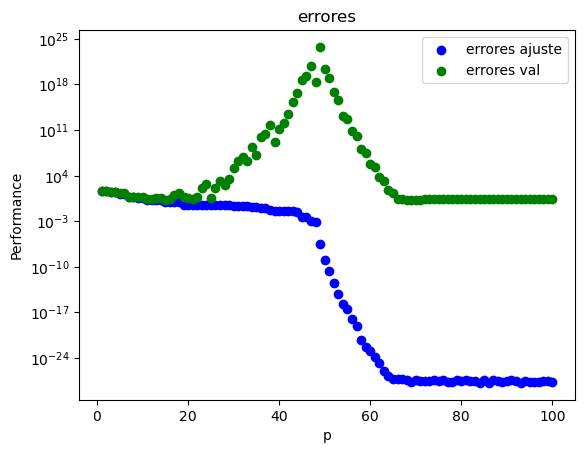

In [160]:
def ajuste_legendre(x, y, grado):
    print("legendre:")
    A = np.polynomial.legendre.legvander(x, grado)
    print(f"Len(legendre): {len(A)} Len(legendre[0]) {len(A[0])}")
    return cml(A, y)



def experimento_legendre(x_aj, y_aj, x_val, y_val):
    legendres = []
    errores_ajuste = []
    errores_val = []
    grados = []
    for i in range(1 , len(x_aj)*2+ 1):
        A_aj = np.polynomial.legendre.legvander(x_aj, i)
        beta = cml(A_aj, y_aj)
        errores_ajuste.append(error_cml(A_aj, beta, y_aj))
        A_val = np.polynomial.legendre.legvander(x_val, i)
        errores_val.append(error_cml(A_val, beta, y_val))
        grados.append(i)


    print(errores_ajuste)
    print(errores_val)
    plt.figure()
    plt.scatter(grados, errores_ajuste, color='b', label=f'errores ajuste')
    plt.scatter(grados, errores_val, color='g', label=f'errores val')
    plt.yscale("log")
    plt.title('errores')
    plt.xlabel('p')
    plt.ylabel('Performance')
    plt.legend()
    # plt.savefig("performance_de_p_con_k_fijo")
    plt.show()

experimento_legendre(ajuste[:, 0], ajuste[:, 1], validacion[:, 0], validacion[:, 1])

### 3.B

Mejor grado: 32, Mejor lambda: 0.005600000000000012, Error mínimo: 10.858367723979422
[[11.422514837346348, 11.422112244662687, 11.421710337206846, 11.42130911377847, 11.4209085731796, 11.420508714215027, 11.420109535692012, 11.419711036420386, 11.419313215212615, 11.41891607088361, 11.418519602250855, 11.418123808134386, 11.417728687356773, 11.4173342387431, 11.416940461120973, 11.416547353320457, 11.416154914174177, 11.41576314251728, 11.415372037187291, 11.414981597024365, 11.414591820871042, 11.414202707572324, 11.413814255975707, 11.413426464931177, 11.41303933329115, 11.412652859910443, 11.412267043646366, 11.411881883358637, 11.411497377909445, 11.411113526163334, 11.410730326987316, 11.410347779250806, 11.409965881825585, 11.409584633585878, 11.409204033408278, 11.408824080171772, 11.408444772757715, 11.408066110049827, 11.40768809093426, 11.407310714299411, 11.40693397903614, 11.406557884037618, 11.40618242819934, 11.405807610419162, 11.40543342959726, 11.405059884636154, 11.4

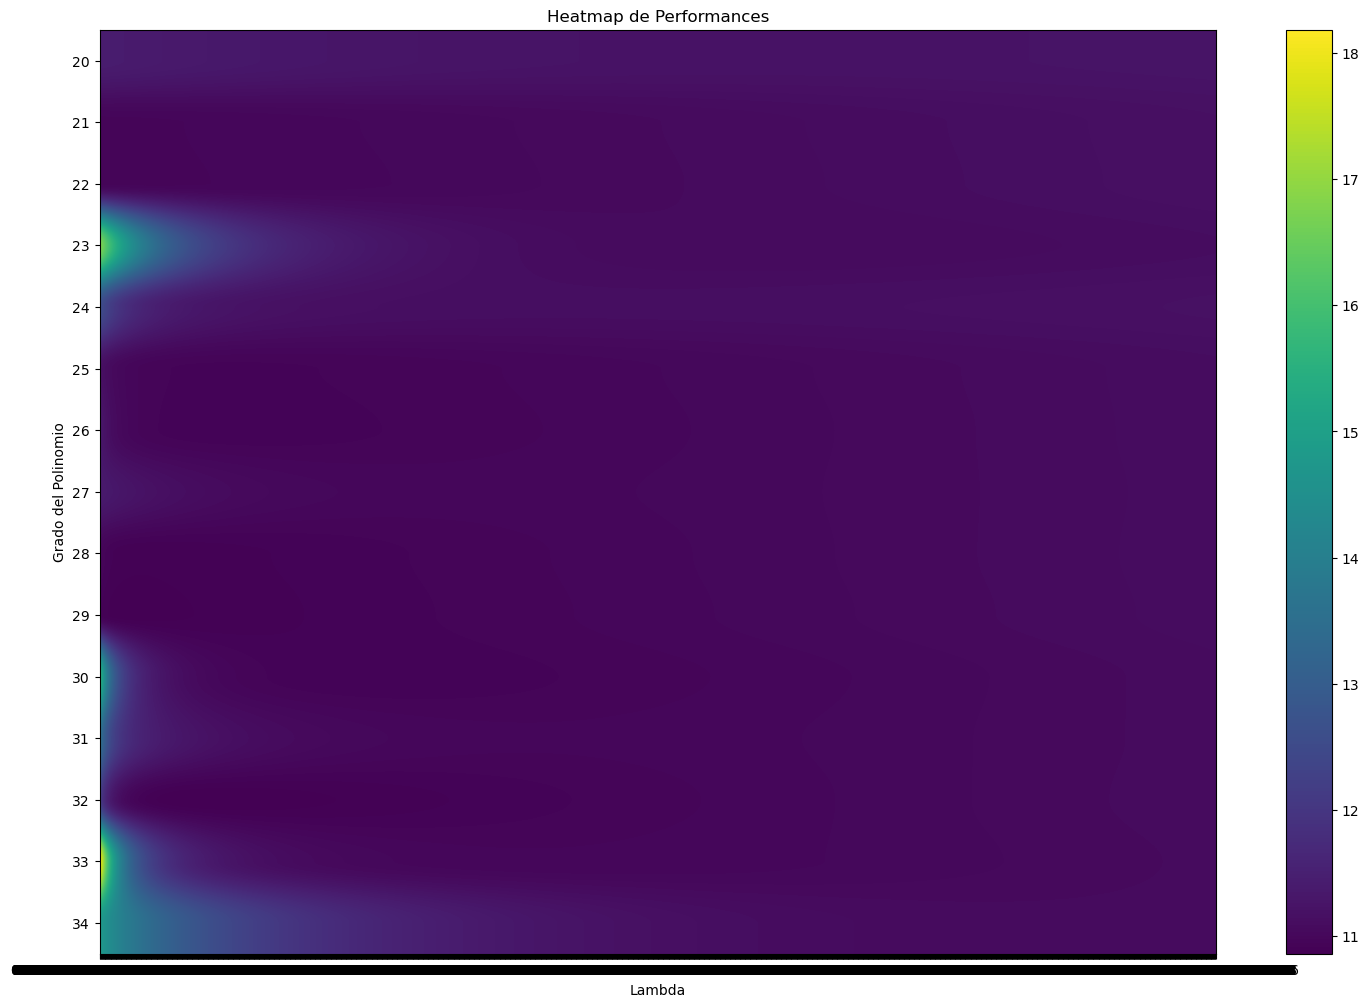

In [177]:
def exploracion_hiperparametros(x_val, y_val):
    lambdas = np.arange(0.001, 0.05, 0.00002)
    # grad
    errores = []
    grados = []
    for i in range(20,  35):
        grados.append(i)
        error_outs = []
        for l in lambdas:
            A_val = np.polynomial.legendre.legvander(x_val, i)
            beta = cml_regularizacion(A_val, y_val, l)
            error_outs.append(error_cml(A_val, beta, y_val))
        errores.append(error_outs)

    error_minimo = 10000000
    mejor_grado = 0
    mejor_lambda = 0
    
    for i in range(0, len(errores)):
        for j in range(0, len(errores[0])):
            if error_minimo > errores[i][j]:
                error_minimo = errores[i][j]
                mejor_grado = grados[i]
                mejor_lambda = lambdas[j]
    
    print(f"Mejor grado: {mejor_grado}, Mejor lambda: {mejor_lambda}, Error mínimo: {error_minimo}")

    print(errores)
    # Crear la figura y el heatmap
    plt.figure(figsize=(18, 12))
    plt.imshow(errores, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Heatmap de Performances')
    plt.xlabel('Lambda')
    plt.ylabel('Grado del Polinomio')
    plt.xticks(np.arange(len(lambdas)), lambdas)  # Etiquetas del eje X con valores de lambda
    plt.yticks(np.arange(len(grados)), grados)  # Etiquetas del eje Y con grados del polinomio
    plt.show()


exploracion_hiperparametros(validacion[:, 0], validacion[:, 1])
        

In [171]:
import numpy as np

def encontrar_mejores_parametros(x_val, y_val):
    # Definimos el rango de lambdas y grados a explorar
    lambdas = np.arange(0.001, 0.05, 0.002)
    grados = range(15, 40)

    # Inicializamos las variables para guardar el mejor lambda, grado y el error mínimo asociado
    mejor_lambda = None
    mejor_grado = None
    error_minimo = np.inf  # Inicializamos con infinito para asegurarnos de que cualquier error encontrado sea menor

    # Iteramos sobre cada grado y lambda para encontrar el que minimiza el error
    for grado in grados:
        for l in lambdas:
            # Generamos la matriz de diseño con polinomios de Legendre
            A_val = np.polynomial.legendre.legvander(x_val, grado)
            # Calculamos los coeficientes beta utilizando la regularización
            beta = cml_regularizacion(A_val, y_val, l)
            # Calculamos el error para los coeficientes beta encontrados
            error_actual = error_cml(A_val, beta, y_val)

            # Actualizamos el mejor lambda, grado y error si encontramos un nuevo mínimo
            if error_actual < error_minimo:
                mejor_lambda = l
                mejor_grado = grado
                error_minimo = error_actual

    return mejor_grado, mejor_lambda, error_minimo

mejor_grado, mejor_lambda, error_minimo = encontrar_mejores_parametros(validacion[:, 0], validacion[:, 1])
print(f"Mejor grado: {mejor_grado}, Mejor lambda: {mejor_lambda}, Error mínimo: {error_minimo}")


Mejor grado: 32, Mejor lambda: 0.005, Error mínimo: 10.85954543101508
